In [1]:
import json
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list

result_list = load_json('gen_setting')

df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
show_grouped_result

,task_num,random_u,random_c,random_t,GreedyNE_u,GreedyNE_c,GreedyNE_t,GreedyNE_iter,CF_u,CF_c,CF_t,CF_iter,GA_u,GA_c,GA_t,GA_iter,int_GA_u,int_GA_iter
0,100,1688.53,493.46,0.004031,3501.92,500,0.355533,35.16,5301.09,499.17,0.789320,123.01,3613.16,500,29.559237,452.37,2622.45,11.75
1,200,3627.03,993.27,0.011529,7519.18,1000,2.075628,66.55,11373.59,999.44,4.043067,217.03,7349.55,1000,87.810736,783.65,5693.76,35.75
2,300,5531.48,1492.55,0.025516,11428.75,1500,6.243164,98.29,17373.62,1499.32,11.215816,300.11,11079.93,1500,168.567540,1065.75,8912.41,70.22
3,400,7393.42,1992.40,0.044281,15371.21,2000,13.899790,130.29,23468.14,1999.36,23.920886,383.14,14621.79,2000,277.715324,1300.25,12078.85,111.24
4,500,9321.13,2494.08,0.066527,19337.76,2500,25.834089,162.17,29560.89,2499.46,43.447136,463.13,18246.63,2500,419.431493,1607.24,15570.77,166.25
5,600,11061.47,2993.22,0.093357,23145.19,3000,42.991722,193.57,35434.89,2999.44,70.011089,541.35,21612.40,3000,565.940855,1838.41,18800.96,228.40
6,700,13120.21,3493.22,0.129940,27256.06,3500,67.018662,226.55,41949.59,3499.46,107.158358,632.40,25363.73,3500,712.310190,2010.28,22508.56,299.87
7,800,15038.18,3992.48,0.166378,31160.21,4000,97.914670,258.78,48194.07,3999.43,155.305993,717.44,28962.52,4000,889.467728,2175.56,25963.98,365.38
8,900,17067.37,4492.19,0.204335,35205.88,4500,138.542841,291.48,54427.94,4499.45,216.937811,800.52,32486.31,4500,972.518612,2165.75,29620.90,457.49
9,1000,18914.03,4992.64,0.254808,39212.06,5000,187.145290,323.99,60869.09,4999.48,292.080109,882.14,35886.09,5000,1000.845617,2027.11,33197.97,557.83


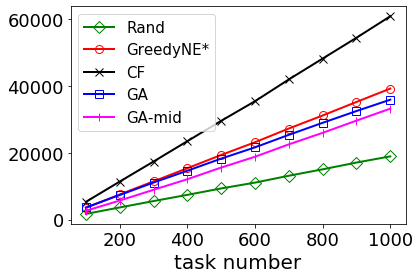

In [4]:
# utility
plt.figure()
x = result_agg['task_num']
y1 = result_agg['random_u']
plt.plot(x, y1, 'b-', linewidth=2, color='green', marker='D', fillstyle='none', markersize=8)

# y2 = result_agg['LS_CF_u']
# plt.plot(x, y2, 'b-', linewidth=2, color='orange', marker='^', fillstyle='none', markersize=8)

y3 = result_agg['GreedyNE_u']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_u']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_u']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

y7 = result_agg['int_GA_u']
plt.plot(x, y7, 'b-', linewidth=2, color='magenta', marker='|', fillstyle='none', markersize=8)

# plt.legend(['Rand', 'CF-LS', 'GA', 'GA-mid'], fontsize=15)
plt.legend(['Rand', 'GreedyNE*', 'CF', 'GA', 'GA-mid'], fontsize=15)
# ax = plt.gca()
# ax.set_yscale('log')
# plt.ylabel('utility', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('gen_u.pdf',bbox_inches='tight')

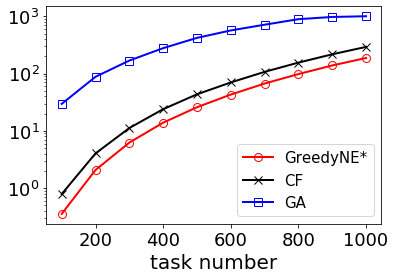

In [5]:
# time
plt.figure()
x = result_agg['task_num']
# y1 = result_agg['random_t']
# plt.plot(x, y1, 'b-', linewidth=2, color='green', marker='D', fillstyle='none', markersize=8)

# y2 = result_agg['LS_CF_t']
# plt.plot(x, y2, 'b-', linewidth=2, color='orange', marker='^', fillstyle='none', markersize=8)

y3 = result_agg['GreedyNE_t']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_t']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_t']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

# plt.legend(['CF-LS', 'GA'], fontsize=15)
plt.legend(['GreedyNE*', 'CF', 'GA'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('time', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('gen_t.pdf',bbox_inches='tight')

In [5]:
result_list = load_json('discuss_gen_CF_GA')

df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
show_grouped_result
############### Compare GA and CF #######################
exp_times = len(result_list)/len(result_agg)
exp_ind = list(range(0, int(exp_times)))
tasks = [result_list[i]['task_num'] for i in range(0, len(result_agg))]
CF_u = [[] for i in range(0, len(tasks))]
GA_u = [[] for i in range(0, len(tasks))]
extra_ind = [[] for i in range(0, len(tasks))]
for t in tasks:
    t_ind = tasks.index(t)
    for i in range(0, len(result_list)):
        if result_list[i]['task_num'] == t:
            CF_u[t_ind].append(result_list[i]['CF_u'])
            GA_u[t_ind].append(result_list[i]['GA_u'])
        extra_ind[t_ind].append(result_list[i]['ex_identifier'])

GA_better_CF = [0 for i in list(range(0, len(tasks)))] 
CF_better_GA = [0 for i in list(range(0, len(tasks)))] 
equal = [0 for i in list(range(0, len(tasks)))] 
for k in exp_ind:
    for i in range(0, len(tasks)): 
        if GA_u[i][k] > CF_u[i][k]:
            GA_better_CF[i] += 1   
        if GA_u[i][k] < CF_u[i][k]:
            CF_better_GA[i] += 1
        if GA_u[i][k] == CF_u[i][k]:
            equal[i] += 1

print(GA_better_CF)  
print(CF_better_GA) 
print(equal)


[471, 113, 15, 3]
[205, 879, 980, 997]
[324, 8, 5, 0]
